<a href="https://colab.research.google.com/github/Aiengineer360/CreditCard-Fraud-Detection/blob/main/EDA_of_Credit_Card_Transactions_for_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Credit Card Transactions for Fraud Detection**

####import libraries

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

####import dataset


In [6]:
credit_card_df = pd.read_csv('creditcard.csv')

####Total Rows and Colunms

In [ ]:
credit_card_df.shape

(284807, 31)

####Colums Names and their Datatypes

In [ ]:
credit_card_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

####Missing and Null Values

In [ ]:
credit_card_df.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


No missing and null values are present in it.

####No. of Fraudulent and Legitimate Transactions

In [ ]:
credit_card_df['Class'].value_counts()

,count
Class,
0,284315
1,492


*   Fraudulent Transactions: 492
*   Legitimate Transactions: 284315



####%age of Fraudulent Transactions

In [ ]:
fraudulent_transactions = credit_card_df[credit_card_df['Class'] == 1]
total_transactions = credit_card_df['Class'].count()
percentage_of_fraudulent_transactions = (fraudulent_transactions.shape[0] / total_transactions) * 100
print(percentage_of_fraudulent_transactions)


0.1727485630620034


Out of 284315 transactions 0.17% are fraudulent.

####Minimum Amount

In [ ]:
credit_card_df['Amount'].min()

0.0

####Maximum Amount

In [ ]:
credit_card_df['Amount'].max()

25691.16

####Mean Value for Amount

In [ ]:
credit_card_df['Amount'].mean()

88.34961925093133

####Median Value for Amount

In [ ]:
credit_card_df['Amount'].median()

22.0

####Is Maximum Transaction Amount Fraudulent?

In [ ]:
max_transaction_amount = credit_card_df['Amount'].max()
credit_card_df[['Amount' , 'Class']][credit_card_df['Amount'] == max_transaction_amount]

,Amount,Class
274771,25691.16,0


The maximum amount in transactions is not fraudulent.

####Bar Chart for Count Show of Legitimate Transactions vs Fraudulent Transactions

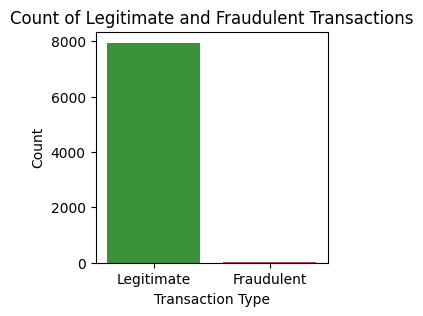

In [10]:
data = credit_card_df['Class'].replace({0: 'Legitimate', 1: 'Fraudulent'})
data_df = pd.DataFrame({'Transaction Type': data})
plt.figure(figsize=(3, 3))
sns.countplot(
    data=data_df,
    x='Transaction Type',
    hue='Transaction Type',
    palette={'Legitimate': '#2ca02c', 'Fraudulent': '#d62728'},
    dodge=False,
    legend=False
)
plt.title('Count of Legitimate and Fraudulent Transactions')
plt.xlabel('Transaction Type')
plt.ylabel('Count')
plt.show()


####Histogram of Transaction Amounts

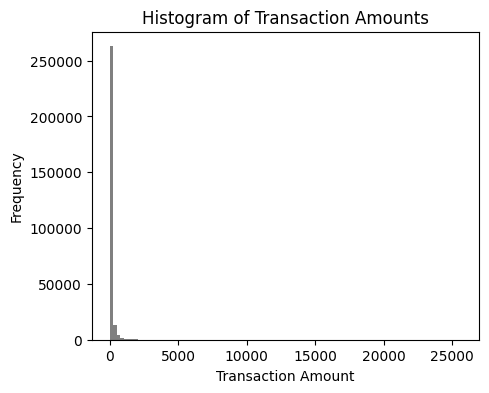

In [ ]:
amount = credit_card_df['Amount']
plt.figure(figsize=(5,4))
plt.hist(x=amount, bins=100, color='grey')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.title('Histogram of Transaction Amounts')
plt.show()

####Heatmap for Coorelation between Numerical Values

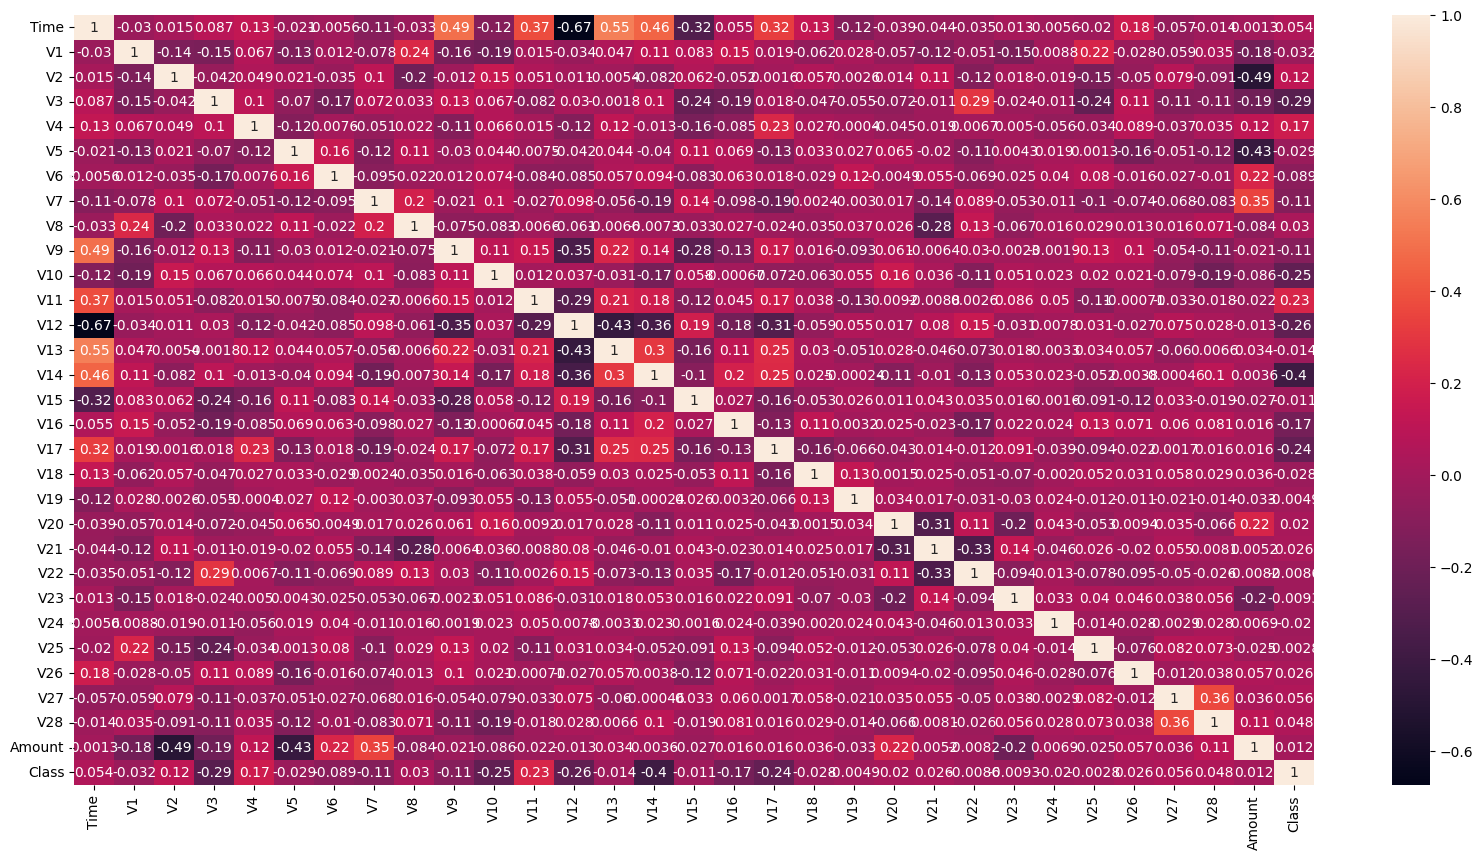

In [12]:
plt.figure(figsize=(20,10))
sns.heatmap(credit_card_df.corr(), annot=True)
plt.show()